In [1]:
import os.path
from scipy import *
import numpy as np
from numpy import *
from numpy import linalg as LA
from scipy import linalg as LA2
import sympy as sympy
import sys as sys
import time
import matplotlib.pyplot as plt
import itertools as it
from IPython.core.display import HTML
import BasicTools as BT
import WaveTools as WT
import PlotTools as PT
import FFTTools as FFTT
import OperatorTools as OT
import GridTransferTools as GTT

display(HTML("<style>pre { white-space: pre !important; }</style>"))
np.set_printoptions( linewidth = 1000)

This cell initializes some example AMR grid.

In [2]:
cells = [[0, 1, 3], [0, 1, 6, 7]]#, [0, 1, 2]] # [[1], [2], [4, 5], [8, 9, 11]] #, [16, 17, 19, 22]]
omega = BT.Grid(4)
for i in cells:
    print('now', omega.levels)
    omega.AddCell(2, i)
    print('refRatios:', omega.refRatios)
    print('nh:', omega.nh)
    print(omega.degFreed)

now 0
refRatios: [4, 2]
nh: [4, 8]
[4, 7]
now 1
refRatios: [4, 2, 2]
nh: [4, 8, 16]
[4, 7, 11]


This cell computes the node-centered and cell-centered modes of the `omega` grid object and then plots them.

1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


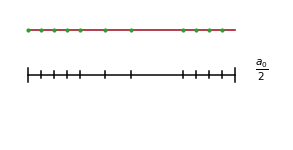

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


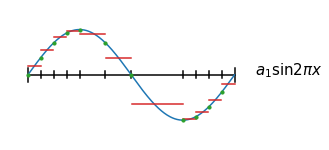

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


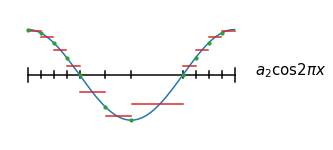

-0.9998442534369987 0.9998442534369986
-0.9998442534369987 0.9998442534369987
1.9996885068739974
-1.499766380155498 1.499766380155498
2.999532760310996


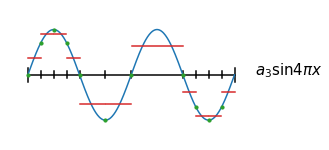

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


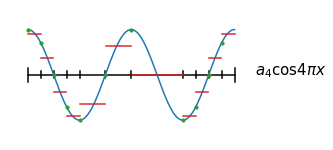

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


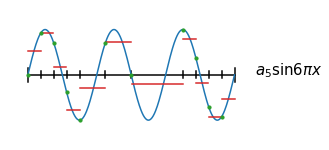

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


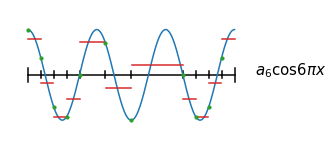

-0.9998442534369987 0.9998442534369986
-0.9998442534369987 0.9998442534369987
1.9996885068739974
-1.499766380155498 1.499766380155498
2.999532760310996


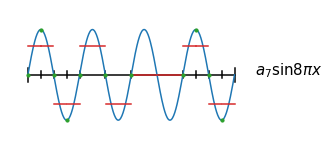

-0.9993770622619783 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


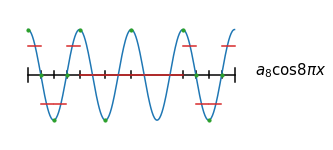

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


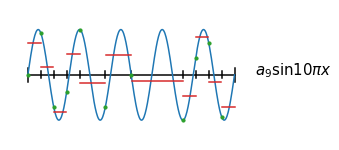

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


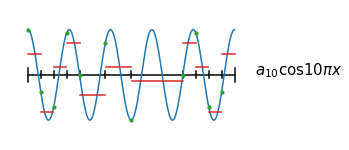

-0.9998442534369987 0.9998442534369987
-0.9998442534369987 0.9998442534369987
1.9996885068739974
-1.499766380155498 1.499766380155498
2.999532760310996


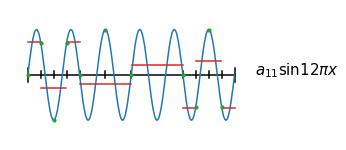

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


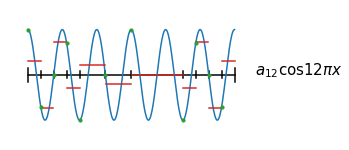

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


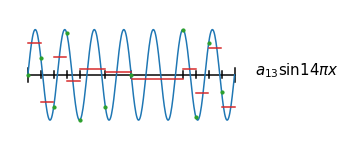

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


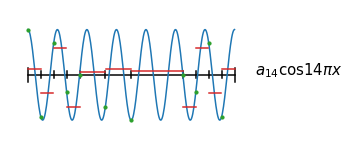

-0.9998442534369987 0.9998442534369986
-0.9998442534369987 0.9998442534369987
1.9996885068739974
-1.499766380155498 1.499766380155498
2.999532760310996


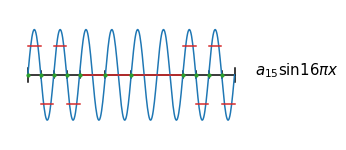

[[ 1.00000000e+00  1.93839179e-01  9.74495358e-01  3.72923229e-01  9.00316316e-01  5.23994577e-01  7.84213304e-01  6.36619772e-01  6.36619772e-01  7.04194890e-01  4.70527982e-01  7.24518620e-01  3.00105439e-01  6.99874143e-01  1.39213623e-01  6.36619772e-01]
 [ 1.00000000e+00  5.52007278e-01  8.26137274e-01  9.00316316e-01  3.72923229e-01  9.25042664e-01 -1.84002426e-01  6.36619772e-01 -6.36619772e-01  1.65227455e-01 -8.30654509e-01 -3.00105439e-01 -7.24518620e-01 -5.93324649e-01 -3.96446856e-01 -6.36619772e-01]
 [ 1.00000000e+00  8.26137274e-01  5.52007278e-01  9.00316316e-01 -3.72923229e-01  1.84002426e-01 -9.25042664e-01 -6.36619772e-01 -6.36619772e-01 -8.30654509e-01  1.65227455e-01 -3.00105439e-01  7.24518620e-01  3.96446856e-01  5.93324649e-01  6.36619772e-01]
 [ 1.00000000e+00  9.74495358e-01  1.93839179e-01  3.72923229e-01 -9.00316316e-01 -7.84213304e-01 -5.23994577e-01 -6.36619772e-01  6.36619772e-01  4.70527982e-01  7.04194890e-01  7.24518620e-01 -3.00105439e-01 -1.39213623e-

In [3]:
waves = WT.MakeWaves(omega)
wavesNode = WT.MakeNodeWaves(omega)
PT.PlotWaves(omega, waves, waveNode = wavesNode)
print(waves)

This cell finds our waves which alias to zero on the coarse grid.

[4, 8, 16]
h is 0.25
[4 5 6 7]
[5 6]
4 8
[[ 9.00316316e-01  5.23994577e-01  7.84213304e-01  6.36619772e-01]
 [ 3.72923229e-01  9.25042664e-01 -1.84002426e-01  6.36619772e-01]
 [-3.72923229e-01  1.84002426e-01 -9.25042664e-01 -6.36619772e-01]
 [-9.00316316e-01 -7.84213304e-01 -5.23994577e-01 -6.36619772e-01]
 [-6.36619772e-01 -3.00105439e-01  7.24518620e-01  6.36619772e-01]
 [ 6.36619772e-01  7.24518620e-01 -3.00105439e-01 -6.36619772e-01]
 [ 1.94908592e-16 -2.12206591e-01  2.12206591e-01  0.00000000e+00]
 [-9.00316316e-01  7.84213304e-01 -5.23994577e-01  6.36619772e-01]
 [-3.72923229e-01 -1.84002426e-01 -9.25042664e-01  6.36619772e-01]
 [ 3.72923229e-01 -9.25042664e-01 -1.84002426e-01 -6.36619772e-01]
 [ 9.00316316e-01 -5.23994577e-01  7.84213304e-01 -6.36619772e-01]]

[[ 0.52399458  0.7842133 ]
 [ 0.92504266 -0.18400243]
 [ 0.18400243 -0.92504266]
 [-0.7842133  -0.52399458]
 [-0.30010544  0.72451862]
 [ 0.72451862 -0.30010544]
 [-0.21220659  0.21220659]
 [ 0.7842133  -0.52399458]
 [-0

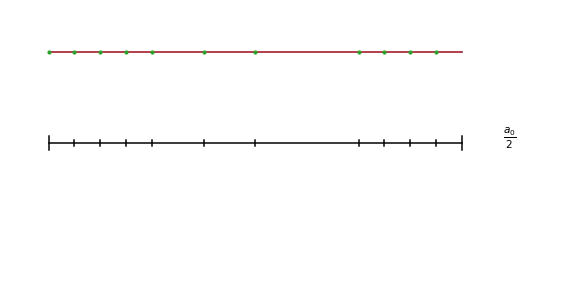

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


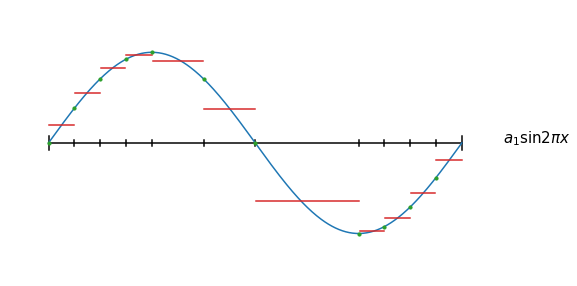

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


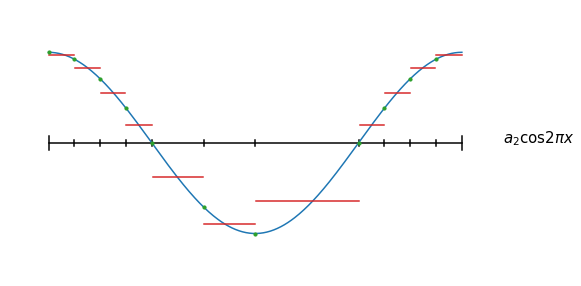

-0.9998442534369987 0.9998442534369986
-0.9998442534369987 0.9998442534369987
1.9996885068739974
-1.499766380155498 1.499766380155498
2.999532760310996


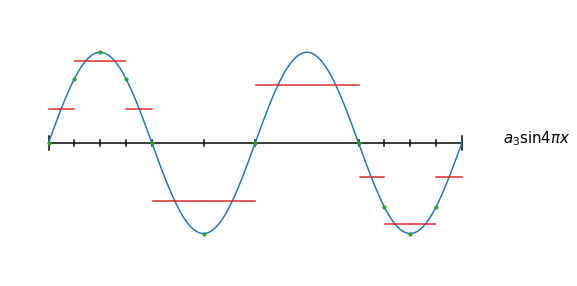

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


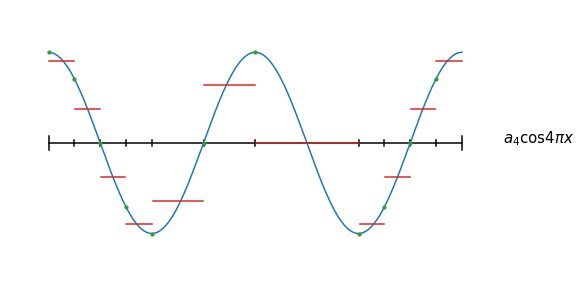

-0.9998442534369987 0.9998442534369986
-0.9998442534369987 0.9998442534369987
1.9996885068739974
-1.499766380155498 1.499766380155498
2.999532760310996


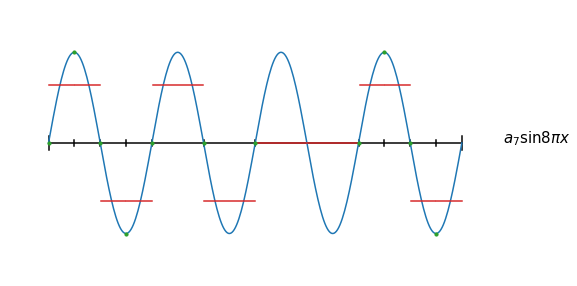

-0.9999610626011927 0.9999610626011927
-0.9999610626011927 0.9999610626011927
1.9999221252023853
-1.499941593901789 1.499941593901789
2.999883187803578


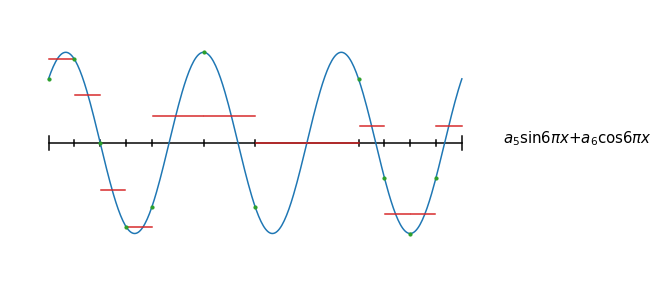

-0.9993770622619783 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


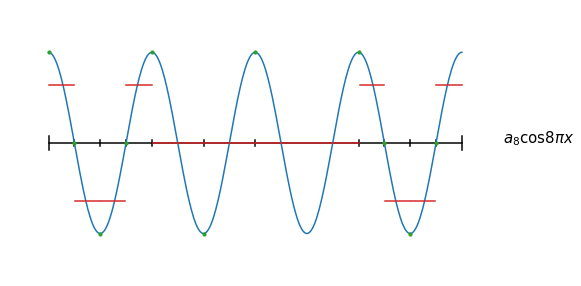

-0.9998442534369987 0.9998442534369986
-0.9998442534369987 0.9998442534369987
1.9996885068739974
-1.499766380155498 1.499766380155498
2.999532760310996


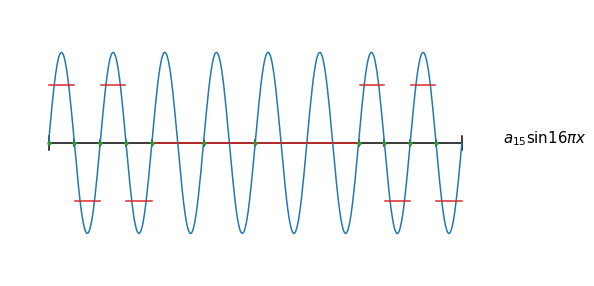

-1.6953739494996198 1.569915544091669
-1.6953739494996198 1.6953739494996198
3.3907478989992397
-2.5430609242494295 2.5430609242494295
5.086121848498859


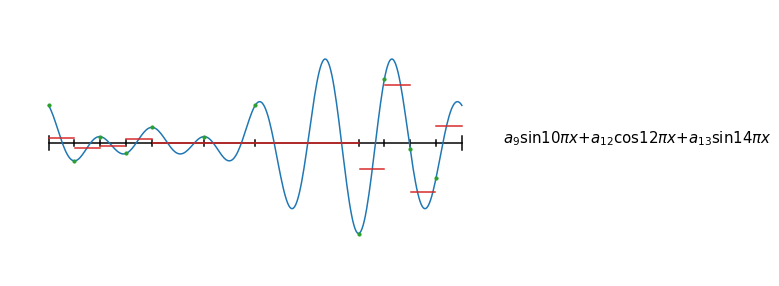

-1.6771979706383813 1.5613217243040214
-1.6771979706383813 1.6771979706383813
3.3543959412767625
-2.5157969559575717 2.5157969559575717
5.031593911915143


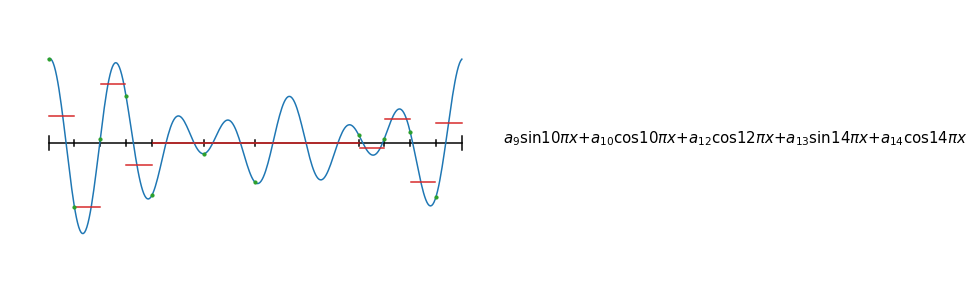

In [4]:
nullspace = OT.FindNullspace(omega, waves)
print('')
print(nullspace)
PT.PlotWaves(omega, waves, waveNode = wavesNode, nullspace = nullspace, rescale = 2)

To go from fine to coarse, the term would be averaging down. For example, it would 0.5:0.5 for a refinement ratio of 2. This is exact for finite-volume.

To go from coarse to fine, there are two options. Piecewise constant, and piecewise linear. The piecewise linear takes neighboring values to interpolate to fine cell averages. advection

[4, 8]
[4, 8, 16]
[4, 8, 16, 32]
[4, 8, 16, 32, 64]
1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


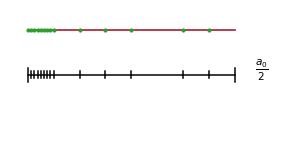

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


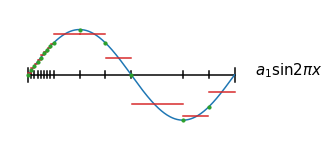

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


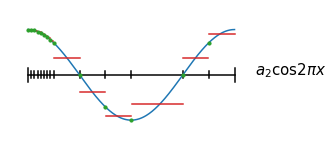

-0.9998442534369987 0.9998442534369986
-0.9998442534369987 0.9998442534369987
1.9996885068739974
-1.499766380155498 1.499766380155498
2.999532760310996


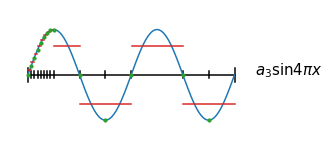

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


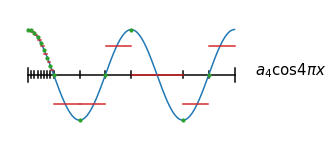

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


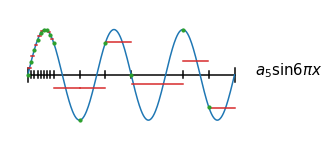

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


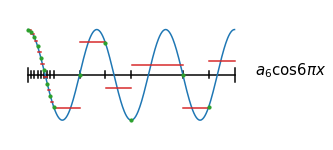

-0.9998442534369987 0.9998442534369986
-0.9998442534369987 0.9998442534369987
1.9996885068739974
-1.499766380155498 1.499766380155498
2.999532760310996


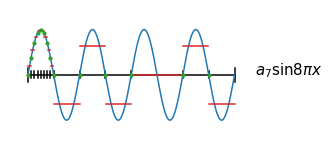

-0.9993770622619783 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


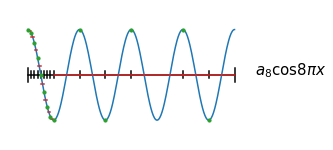

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


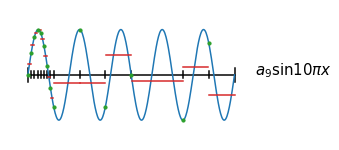

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


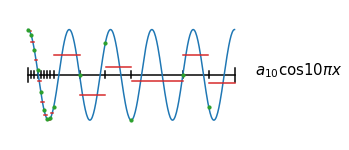

-0.9998442534369987 0.9998442534369987
-0.9998442534369987 0.9998442534369987
1.9996885068739974
-1.499766380155498 1.499766380155498
2.999532760310996


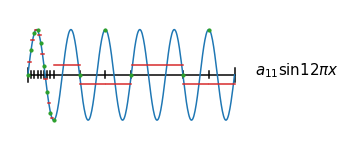

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


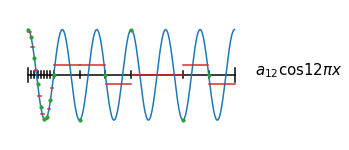

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


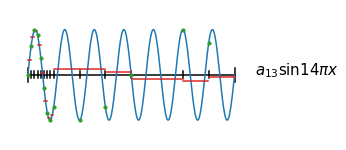

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


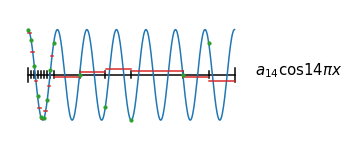

-0.9998442534369987 0.9998442534369986
-0.9998442534369987 0.9998442534369987
1.9996885068739974
-1.499766380155498 1.499766380155498
2.999532760310996


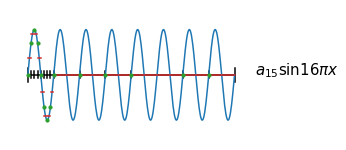

-0.9993770622619783 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


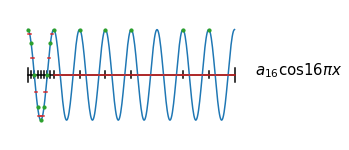

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


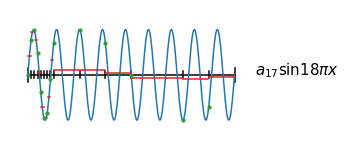

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


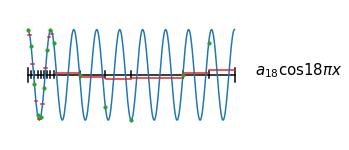

-0.9998442534369987 0.9998442534369986
-0.9998442534369987 0.9998442534369987
1.9996885068739974
-1.499766380155498 1.499766380155498
2.999532760310996


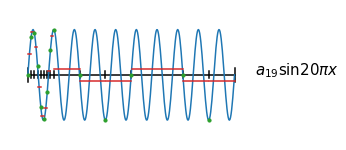

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


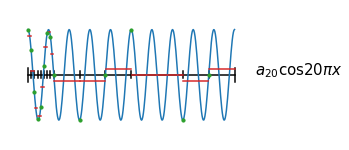

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


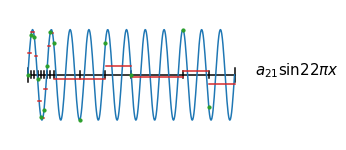

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


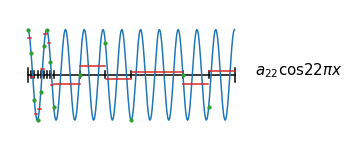

-0.9998442534369987 0.9998442534369986
-0.9998442534369987 0.9998442534369987
1.9996885068739974
-1.499766380155498 1.499766380155498
2.999532760310996


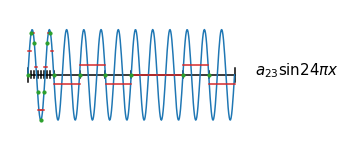

-0.9993770622619786 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


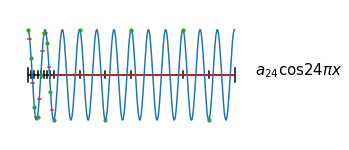

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


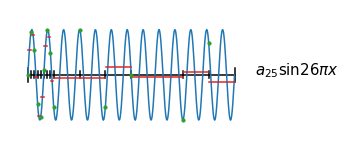

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


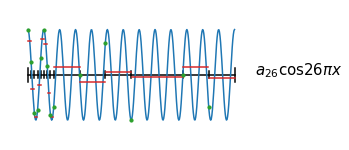

-0.9998442534369988 0.9998442534369989
-0.9998442534369989 0.9998442534369989
1.9996885068739978
-1.4997663801554983 1.4997663801554983
2.9995327603109967


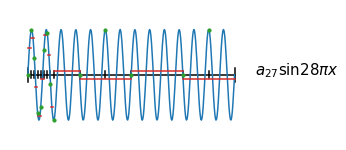

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


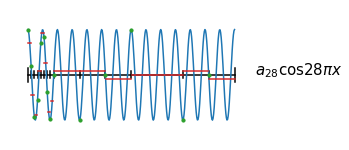

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


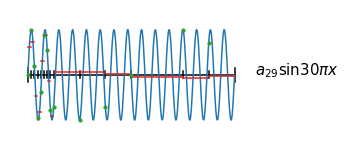

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


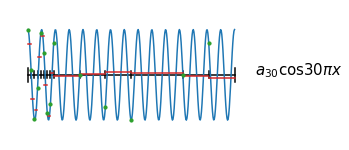

-0.9998442534369988 0.9998442534369987
-0.9998442534369988 0.9998442534369988
1.9996885068739976
-1.4997663801554981 1.4997663801554981
2.9995327603109962


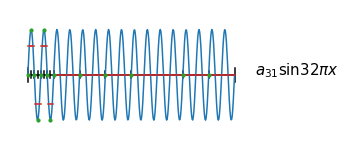

-0.9993770622619784 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


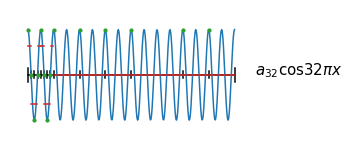

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


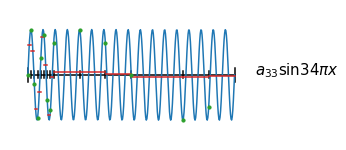

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


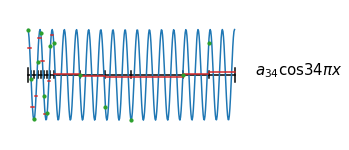

-0.9998442534369988 0.9998442534369987
-0.9998442534369988 0.9998442534369988
1.9996885068739976
-1.4997663801554981 1.4997663801554981
2.9995327603109962


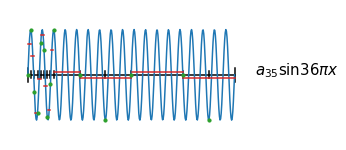

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


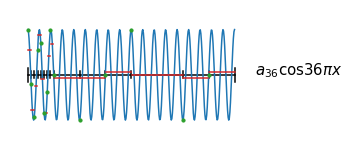

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


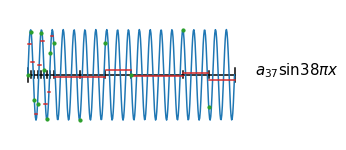

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


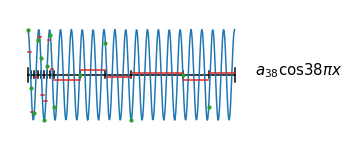

-0.9998442534369988 0.9998442534369986
-0.9998442534369988 0.9998442534369988
1.9996885068739976
-1.4997663801554981 1.4997663801554981
2.9995327603109962


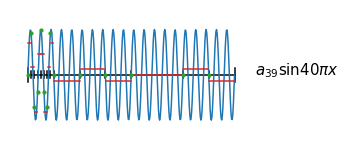

-0.9993770622619784 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


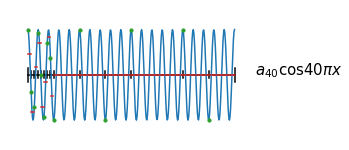

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


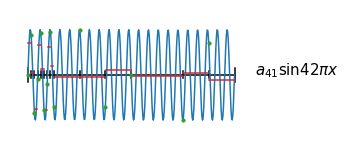

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


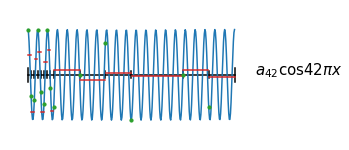

-0.9998442534369991 0.999844253436999
-0.9998442534369991 0.9998442534369991
1.9996885068739982
-1.4997663801554988 1.4997663801554988
2.9995327603109976


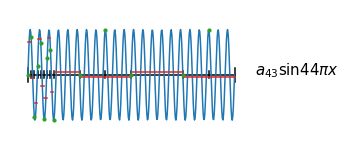

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


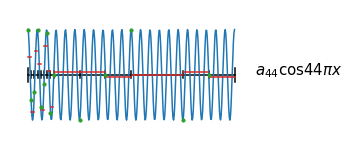

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


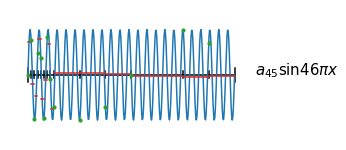

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


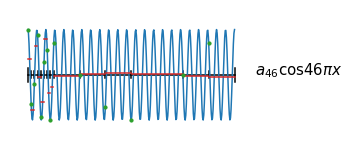

-0.9998442534369988 0.9998442534369986
-0.9998442534369988 0.9998442534369988
1.9996885068739976
-1.4997663801554981 1.4997663801554981
2.9995327603109962


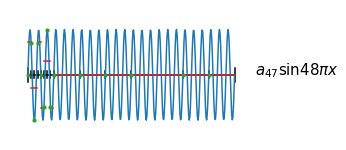

-0.9993770622619786 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


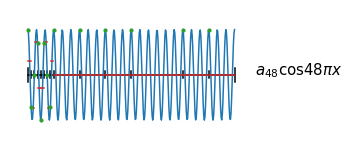

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


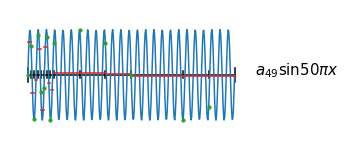

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


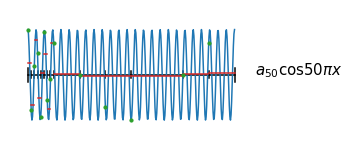

-0.9998442534369987 0.9998442534369989
-0.9998442534369989 0.9998442534369989
1.9996885068739978
-1.4997663801554983 1.4997663801554983
2.9995327603109967


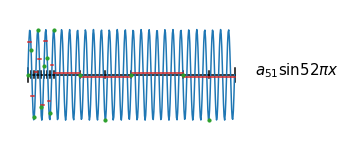

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


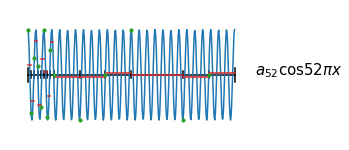

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


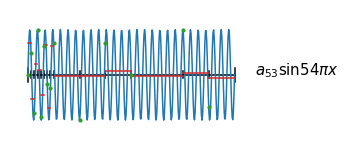

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


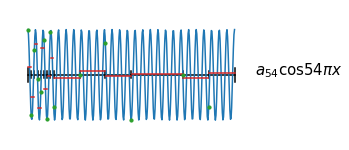

-0.9998442534369989 0.9998442534369987
-0.9998442534369989 0.9998442534369989
1.9996885068739978
-1.4997663801554983 1.4997663801554983
2.9995327603109967


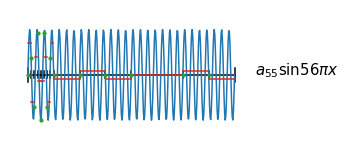

-0.9993770622619792 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


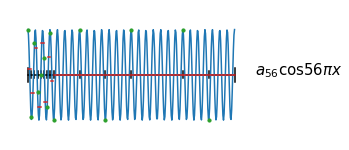

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


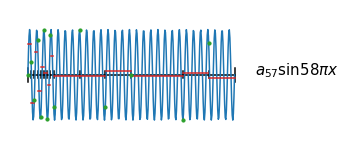

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


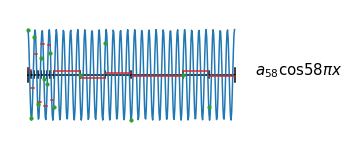

-0.999844253436999 0.9998442534369989
-0.999844253436999 0.999844253436999
1.999688506873998
-1.4997663801554986 1.4997663801554986
2.999532760310997


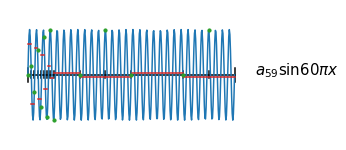

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


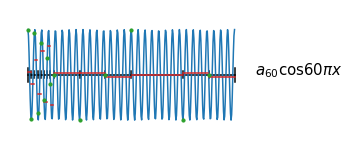

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


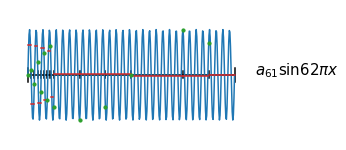

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


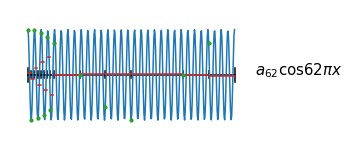

-0.9998442534369988 0.9998442534369987
-0.9998442534369988 0.9998442534369988
1.9996885068739976
-1.4997663801554981 1.4997663801554981
2.9995327603109962


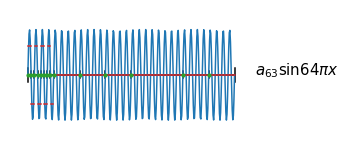

[[ 1.00000000e+00  4.90479714e-02  9.98394393e-01  9.78597633e-02  9.93586851e-01  1.46200713e-01  9.85605147e-01  1.93839179e-01  9.74495358e-01  2.40548025e-01  9.60321547e-01  2.86106072e-01  9.43165321e-01  3.30299505e-01  9.23125276e-01  3.72923229e-01  9.00316316e-01  4.13782159e-01  8.74868869e-01  4.52692443e-01  8.46927993e-01  4.89482602e-01  8.16652385e-01  5.23994577e-01  7.84213304e-01  5.56084686e-01  7.49793401e-01  5.85624475e-01  7.13585488e-01  6.12501464e-01  6.75791226e-01  6.36619772e-01  6.36619772e-01  6.57900632e-01  5.96286376e-01  6.76282781e-01  5.55010935e-01  6.91722726e-01  5.13016538e-01  7.04194890e-01  4.70527982e-01  7.13691623e-01  4.27770297e-01  7.20223104e-01  3.84967269e-01  7.23817099e-01  3.42339992e-01  7.24518620e-01  3.00105439e-01  7.22389447e-01  2.58475077e-01  7.17507549e-01  2.17653536e-01  7.09966392e-01  1.77837323e-01  6.99874143e-01  1.39213623e-01  6.87352779e-01  1.01959153e-01  6.72537106e-01  6.62391234e-02  6.55573701e-01
   3.2

In [5]:
cells = [[0, 1, 3], [0], [0, 1], [0, 1, 2, 3]] # [[1], [2], [4, 5], [8, 9, 11]] #, [16, 17, 19, 22]]
omega2 = BT.Grid(4)
for i in cells:
    omega2.AddCell(2, i)
    print(omega2.nh)

waves = WT.MakeWaves(omega2)
wavesNode = WT.MakeNodeWaves(omega2)
PT.PlotWaves(omega2, waves, waveNode = wavesNode)
print(waves)

[4, 8, 16, 32, 64]
h is 0.25
[4 5 6 7]
[5 6]
4 8
[[ 9.93586851e-01  1.46200713e-01  9.85605147e-01  1.93839179e-01]
 [ 9.55403866e-01  4.26011431e-01  9.00725494e-01  5.52007278e-01]
 [ 8.80505245e-01  6.69134332e-01  7.38275966e-01  8.26137274e-01]
 [ 7.71769302e-01  8.54631832e-01  5.12246607e-01  9.74495358e-01]
 [ 6.33374698e-01  9.66529014e-01  2.42102915e-01  9.74495358e-01]
 [ 4.70639859e-01  9.95189365e-01 -4.88905184e-02  8.26137274e-01]
 [ 2.89818594e-01  9.38144677e-01 -3.35673533e-01  5.52007278e-01]
 [ 9.78597633e-02  8.00307599e-01 -5.93548568e-01  1.93839179e-01]
 [-6.36619772e-01 -3.00105439e-01 -7.24518620e-01 -6.36619772e-01]
 [-6.36619772e-01 -3.00105439e-01  7.24518620e-01  6.36619772e-01]
 [ 6.36619772e-01  7.24518620e-01 -3.00105439e-01 -6.36619772e-01]
 [ 1.94908592e-16 -2.12206591e-01  2.12206591e-01  0.00000000e+00]
 [-6.36619772e-01  3.00105439e-01 -7.24518620e-01  6.36619772e-01]
 [ 6.36619772e-01 -7.24518620e-01  3.00105439e-01 -6.36619772e-01]]

[[ 0.146200

nullspace
 [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00

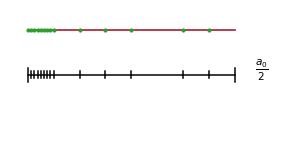

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


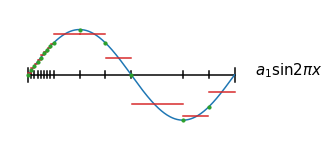

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


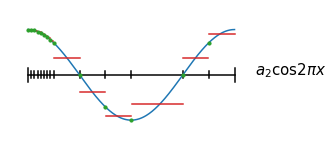

-0.9998442534369987 0.9998442534369986
-0.9998442534369987 0.9998442534369987
1.9996885068739974
-1.499766380155498 1.499766380155498
2.999532760310996


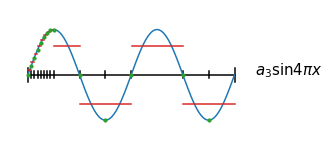

-1.0 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


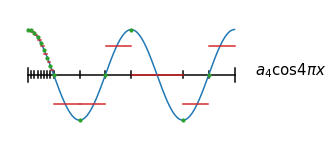

-0.9998442534369987 0.9998442534369986
-0.9998442534369987 0.9998442534369987
1.9996885068739974
-1.499766380155498 1.499766380155498
2.999532760310996


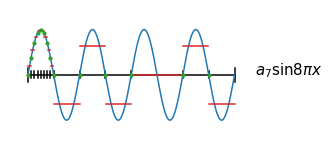

-0.9999610626011927 0.9999610626011927
-0.9999610626011927 0.9999610626011927
1.9999221252023853
-1.499941593901789 1.499941593901789
2.999883187803578


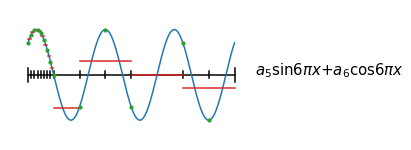

-0.9993770622619783 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


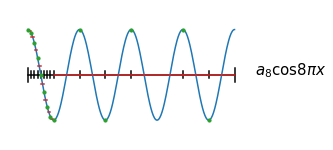

-0.9998442534369987 0.9998442534369986
-0.9998442534369987 0.9998442534369987
1.9996885068739974
-1.499766380155498 1.499766380155498
2.999532760310996


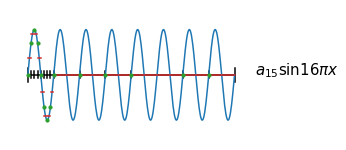

-0.9993770622619783 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


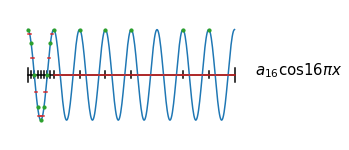

-0.9998442534369988 0.9998442534369987
-0.9998442534369988 0.9998442534369988
1.9996885068739976
-1.4997663801554981 1.4997663801554981
2.9995327603109962


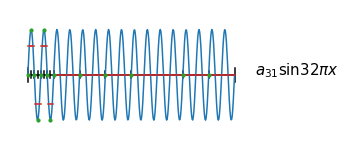

-0.9993770622619784 1.0
-1.0 1.0
2.0
-1.5 1.5
3.0


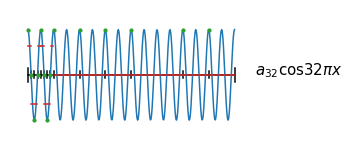

-0.9998442534369988 0.9998442534369987
-0.9998442534369988 0.9998442534369988
1.9996885068739976
-1.4997663801554981 1.4997663801554981
2.9995327603109962


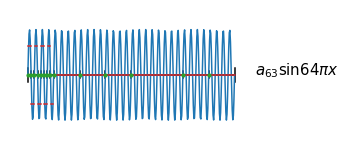

-1.35764501987817 1.35764501987817
-1.35764501987817 1.35764501987817
2.71529003975634
-2.036467529817255 2.036467529817255
4.07293505963451


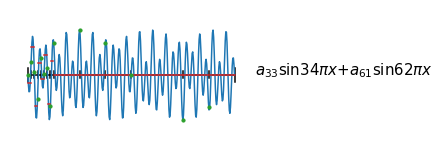

In [6]:
nullspace = OT.FindNullspace(omega2, waves)
print('')
print(nullspace)
PT.PlotWaves(omega2, waves, waveNode = wavesNode, nullspace = nullspace)

In [7]:
a = [3, 4]
full = [0, 1, 2, 3 ,4 ,5, 6, 7]
print(full)
coarseGrid = list([int(i in a) for i in full])
mixedGrid = list(it.chain(*[(int(i in a) + 1) * [int(i in a)] for i in full]))
fineGrid = list(it.chain(*[2 * [int(i in a)] for i in full]))
print(coarseGrid)
print(mixedGrid)
print(fineGrid)

[0, 1, 2, 3, 4, 5, 6, 7]
[0, 0, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 1, 1, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]


In [8]:
A = np.arange(64).reshape(8, 8)
print(A)

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]]


In [9]:
print(A[3:6])

[[24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]]


In [10]:
B = np.arange(5)
print(B)
print(B[1:])

[0 1 2 3 4]
[1 2 3 4]
